In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm

In [ ]:
torch.cuda.is_available()

True

In [ ]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor()
])

In [ ]:
ds_mnist = tv.datasets.MNIST('./datasets', download=True, transform=trans)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



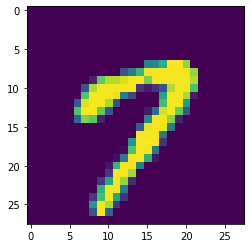

In [ ]:

plt.imshow(ds_mnist[15][0].numpy()[0])

In [ ]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(
    ds_mnist, batch_size=batch_size, shuffle=True,
    num_workers=1, drop_last=True
)

In [ ]:
for img, label in dataloader:
  print(img.shape)
  print(label.shape)
  break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [ ]:
class Neural_numbers(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 10)
    self.act = nn.ReLU()

  def forward(self, x):
    out = self.flat(x)
    out = self.linear1(out)
    out = self.act(out)
    out = self.linear2(out)

    return out

In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
model = Neural_numbers()

In [ ]:
count_parameters(model)

79510

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [ ]:
def accuracy(pred, label):
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1) 
  return answer.mean()

In [ ]:
device = 'cpu' # 'cpu' 'cuda'
model = model.to(device)
loss_fn = loss_fn.to(device)

In [ ]:
epochs = 10

for epoch in range(epochs):
  loss_val = 0
  acc_val = 0
  for img, label in (pbar := tqdm(dataloader)):
    optimizer.zero_grad()
    img = img.to(device)
    label = label.to(device)
    
    label = F.one_hot(label, 10).float()
    pred = model(img)
    
    loss = loss_fn(pred, label)

    loss.backward()
    loss_item = loss.item()
    loss_val += loss_item

    optimizer.step()

    acc_current = accuracy(pred.cpu(), label.cpu())
    acc_val += acc_current

    pbar.set_description(f'loss: {loss_item:.5f}\taccuracy: {acc_current:.3f}')
  print(loss_val/len(dataloader))
  print(acc_val/len(dataloader))

  0%|          | 0/3750 [00:00<?, ?it/s]<ipython-input-39-a82b907a3666>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
loss: 0.53777	accuracy: 0.812:  42%|████▏     | 1566/3750 [00:11<00:15, 138.39it/s]


KeyboardInterrupt: ignored

In [ ]:
accuracy(pred, label)

<ipython-input-77-a82b907a3666>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


1.0

(28, 28)

In [ ]:
img = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)/255.0

In [ ]:
img.shape

(1, 1, 28, 28)

In [ ]:
#t_img = torch.from_numpy(img)
nash_pred = model(img_test)

In [ ]:
F.softmax(nash_pred).detach().numpy().argmax()

<ipython-input-131-15d07e92809c>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(nash_pred).detach().numpy().argmax()


7

In [ ]:
img_test = ds_mnist[15][0].numpy()
img_test = np.expand_dims(img_test, axis=0)
img_test = torch.from_numpy(img_test)

In [ ]:
img_test.shape

(1, 1, 28, 28)